Text(0, 0.5, 'D_value')

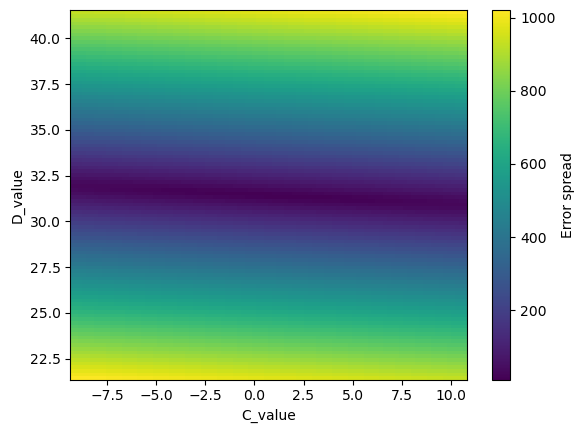

In [2]:
#https://github.com/indohito/EE399

import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt 

X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

def velfit(c, x, y):
    e2 = np.sqrt(np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2))
    return e2

v0 = np.array([3, 1*np.pi/4, 2/3, 32]) 

res= opt.minimize(velfit, v0 , args=(X, Y), method='Nelder-Mead')

c = res.x

A = c[0]
B = c[1]
C_range = np.linspace(c[2]-10, c[2]+10, 100)
D_range = np.linspace(c[3]-10, c[3]+10, 100)


error_values = np.zeros((len(C_range), len(D_range)))
for i in range(len(C_range)):
    for j in range(len(D_range)):
        C = C_range[i]
        D = D_range[j]
        error_values[i, j] = velfit([A, B, C, D], X, Y)
        
plt.pcolor(C_range, D_range, error_values)
cbar = plt.colorbar()
cbar.set_label('Error spread')
plt.xlabel('C_value')
plt.ylabel('D_value')





C:\Users\Akash Shetty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0, 0.5, 'Y value')

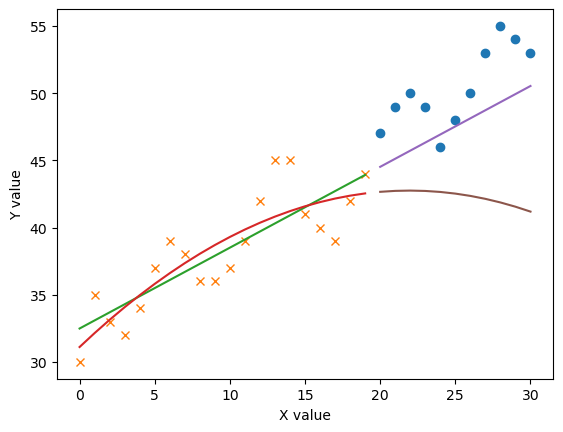

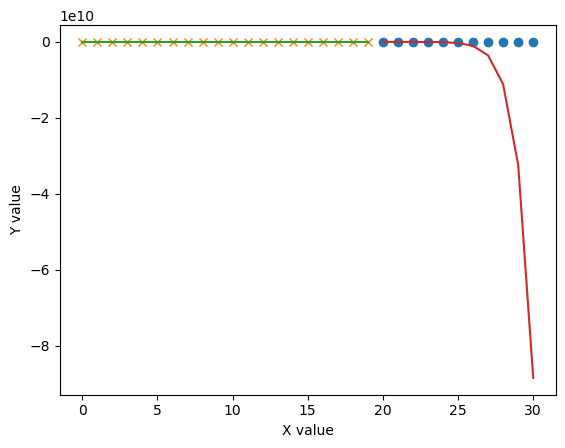

In [4]:

X_train = X[:20]
Y_train = Y[:20]

X_test = X[20:]
Y_test = Y[20:]

#linear fit
a, b = np.polyfit(X_train, Y_train, 1)
linear_fit_train = a*X_train + b
linear_fit_test = a*X_test + b

X_train_error_1 = np.sqrt(np.sum((linear_fit_train-Y_train)**2))
X_test_error_1 = np.sqrt(np.sum((linear_fit_test-Y_test)**2))

a_2, b_2, c_2 = np.polyfit(X_train, Y_train, 2)
parabolic_fit_train = a_2*X_train**2 +b_2*X_train + c_2
parabolic_fit_test = a_2*X_test**2 + b_2*X_test + c_2

X_train_error_2 = np.sqrt(np.sum((linear_fit_train-Y_train)**2))
X_test_error_2 = np.sqrt(np.sum((linear_fit_test-Y_test)**2))


poly_19 = np.polyfit(X_train, Y_train, 19)
poly_19_train = np.polyval(poly_19, X_train)
poly_19_test = np.polyval(poly_19, X_test)

X_train_error_19 = np.sqrt(np.sum((poly_19_train-Y_train)**2))
X_test_error_19 = np.sqrt(np.sum((poly_19_test-Y_test)**2))


plt.figure(1)
plt.plot(X_test, Y_test,'o')
plt.plot(X_train,Y_train,'x')
plt.plot(X_train, linear_fit_train)
plt.plot(X_train, parabolic_fit_train)
plt.plot(X_test, linear_fit_test)
plt.plot(X_test, parabolic_fit_test)
plt.xlabel('X value')
plt.ylabel('Y value')

plt.figure(0)
plt.plot(X_test, Y_test,'o')
plt.plot(X_train,Y_train,'x')
plt.plot(X_train, poly_19_train)
plt.plot(X_test, poly_19_test)
plt.xlabel('X value')
plt.ylabel('Y value')

C:\Users\Akash Shetty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0, 0.5, 'Y values')

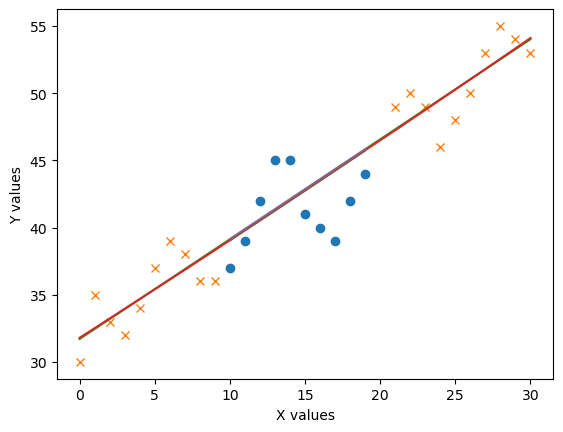

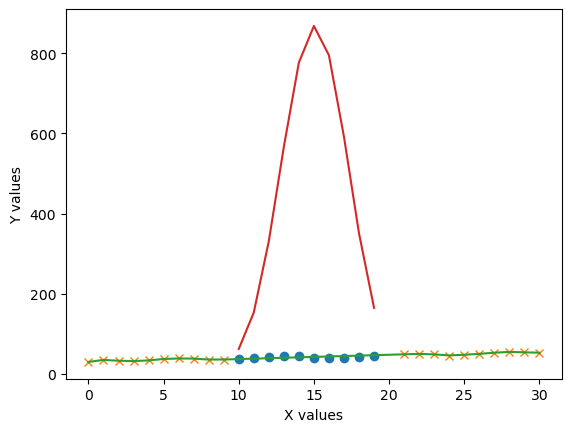

In [6]:
X_train = np.concatenate([X[:10], X[-10:]])
Y_train = np.concatenate([Y[:10], Y[-10:]])

X_test = X[10:20]
Y_test = Y[10:20]

#linear fit
a, b = np.polyfit(X_train, Y_train, 1)
linear_fit_train = a*X_train + b
linear_fit_test = a*X_test + b

X_train_error_1 = np.sqrt(np.sum((linear_fit_train-Y_train)**2))
X_test_error_1 = np.sqrt(np.sum((linear_fit_test-Y_test)**2))

a_2, b_2, c_2 = np.polyfit(X_train, Y_train, 2)
parabolic_fit_train = a_2*X_train**2 +b_2*X_train + c_2
parabolic_fit_test = a_2*X_test**2 + b_2*X_test + c_2

X_train_error_2 = np.sqrt(np.sum((linear_fit_train-Y_train)**2))
X_test_error_2 = np.sqrt(np.sum((linear_fit_test-Y_test)**2))


poly_19 = np.polyfit(X_train, Y_train, 19)
poly_19_train = np.polyval(poly_19, X_train)
poly_19_test = np.polyval(poly_19, X_test)

X_train_error_19 = np.sqrt(np.sum((poly_19_train-Y_train)**2))
X_test_error_19 = np.sqrt(np.sum((poly_19_test-Y_test)**2))

plt.figure(1)
plt.plot(X_test, Y_test,'o')
plt.plot(X_train,Y_train,'x')
plt.plot(X_train, linear_fit_train)
plt.plot(X_train, parabolic_fit_train)
plt.plot(X_test, linear_fit_test)
plt.plot(X_test, parabolic_fit_test)
plt.xlabel('X value')
plt.ylabel('Y value')

plt.figure(0)
plt.plot(X_test, Y_test,'o')
plt.plot(X_train,Y_train,'x')
plt.plot(X_train, poly_19_train)
plt.plot(X_test, poly_19_test)
plt.xlabel('X value')
plt.ylabel('Y value')
